In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df = df[df.high_flow_max == 60]

[-267.04562, 0.17761882, -3.2746673e-05, 2.363089e-09, -5.9409786e-14]
[485.07285, -0.15629351, 2.171287e-05, -1.593652e-09, 5.0006274e-14]
[591.7016, -0.18465495, 2.376421e-05, -1.524885e-09, 4.050688e-14]
[260.89487, -0.17726883, 5.294402e-05, -8.845298e-09, 6.5955515e-13]
[439.14935, -0.123727605, 1.4846688e-05, -9.37486e-10, 2.5469158e-14]
[265.52658, -0.17428845, 4.7778252e-05, -6.915005e-09, 4.3997564e-13]
[-39.094017, 0.1844587, -0.00010388269, 2.0506292e-08, -1.356357e-12]
[153.50581, -0.03293296, -1.0588849e-05, 2.908195e-09, -1.3663465e-13]
[1146.076, -0.48792744, 8.358828e-05, -6.663208e-09, 2.0375895e-13]
[282.69208, -0.19819795, 6.388541e-05, -1.173021e-08, 9.385618e-13]
[525.3733, -0.17077598, 2.2726517e-05, -1.488305e-09, 3.9844077e-14]
[347.74966, -0.29431456, 0.000112003516, -2.2228914e-08, 1.798469e-12]
[304.93762, -0.06413896, 5.014891e-06, -2.4134988e-10, 7.835341e-15]
[230.50008, -0.12648056, 2.929602e-05, -4.533787e-09, 3.867681e-13]
[-0.351837, 0.15758908, -0.000

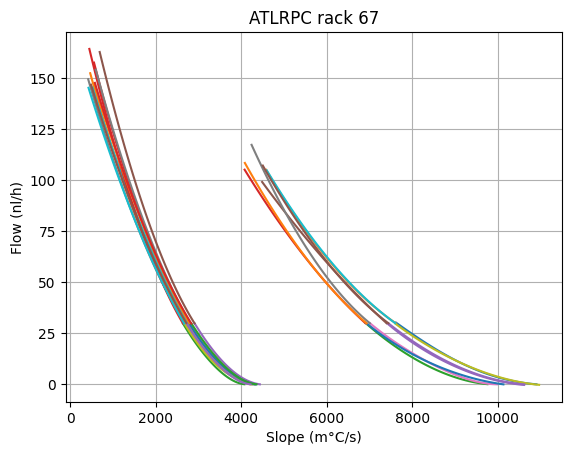

In [12]:
for flowcell in df.flowcell_id:
    row = df[df.flowcell_id == flowcell].iloc[0]
    params_low = [row.low_x0, row.low_x1, row.low_x2, row.low_x3, row.low_x4]
    params_high = [row.high_x0, row.high_x1, row.high_x2, row.high_x3, row.high_x4]
    
    print(params_low)
    
    xx_low = np.linspace(row.slope_low_flow_max, row.slope_low_flow_min, 100)
    xx_high = np.linspace(row.slope_high_flow_max-1500, row.slope_low_flow_max, 100)
    yy_low = [np.dot(params_low, [1, x, x**2, x**3, x**4]) for x in xx_low]
    yy_high = [np.dot(params_high, [1, x, x**2, x**3, x**4]) for x in xx_high]
    plt.plot(xx_low, yy_low)
    plt.plot(xx_high, yy_high)
    plt.grid()
    plt.xlabel('Slope (m°C/s)')
    plt.ylabel('Flow (nl/h)')
    # plt.title(f'Flowcell {flowcell}')
plt.title('ATLRPC rack 67')
plt.grid()
plt.show()